Question: Is the referee bias?

In [84]:
import pandas as pd
# read data
source_df = pd.read_csv('..\epl2020_and_weather.csv')
#source_df.columns.to_list()

In [85]:
dataset = source_df[['temp','heat_index', 'wins_home']].drop_duplicates()

In [86]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[46. 46.]
 [68. 68.]
 [73. 73.]
 [77. 79.]
 [45. 45.]
 [36. 36.]
 [48. 48.]
 [86. 85.]
 [41. 41.]
 [50. 50.]
 [59. 59.]
 [37. 37.]
 [64. 64.]
 [32. 32.]
 [70. 70.]
 [81. 81.]
 [55. 55.]
 [57. 57.]
 [72. 72.]
 [45. 45.]
 [34. 34.]
 [72. 72.]
 [86. 84.]
 [43. 43.]
 [59. 59.]
 [61. 61.]
 [54. 54.]
 [46. 46.]
 [63. 63.]
 [61. 61.]
 [81. 80.]
 [36. 36.]
 [41. 41.]
 [63. 63.]
 [66. 66.]
 [39. 39.]
 [43. 43.]]
[0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0]
[[52. 52.]
 [79. 79.]
 [82. 81.]
 [37. 37.]
 [66. 66.]
 [55. 55.]
 [34. 34.]
 [50. 50.]
 [54. 54.]
 [68. 68.]
 [48. 48.]
 [39. 39.]
 [52. 52.]]
[0 0 0 1 0 0 0 0 1 0 0 1 1]


In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.67999889 -0.68171073]
 [ 0.74659672  0.7558865 ]
 [ 1.07082299  1.08261315]
 [ 1.33020401  1.47468512]
 [-0.74484414 -0.74705605]
 [-1.32845143 -1.33516401]
 [-0.55030838 -0.55102007]
 [ 1.9138113   1.86675709]
 [-1.00422516 -1.00843737]
 [-0.42061787 -0.42032941]
 [ 0.16298942  0.16777855]
 [-1.26360618 -1.26981868]
 [ 0.4872157   0.49450519]
 [-1.58783245 -1.59654533]
 [ 0.87628723  0.88657716]
 [ 1.58958503  1.60537578]
 [-0.09639159 -0.09360277]
 [ 0.03329891  0.03708789]
 [ 1.00597773  1.01726782]
 [-0.74484414 -0.74705605]
 [-1.45814194 -1.46585467]
 [ 1.00597773  1.01726782]
 [ 1.9138113   1.80141176]
 [-0.87453465 -0.87774671]
 [ 0.16298942  0.16777855]
 [ 0.29267993  0.2984692 ]
 [-0.16123685 -0.1589481 ]
 [-0.67999889 -0.68171073]
 [ 0.42237044  0.42915986]
 [ 0.29267993  0.2984692 ]
 [ 1.58958503  1.54003045]
 [-1.32845143 -1.33516401]
 [-1.00422516 -1.00843737]
 [ 0.42237044  0.42915986]
 [ 0.61690621  0.62519585]
 [-1.13391567 -1.13912803]
 [-0.87453465 -0.87774671]]


In [89]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [90]:
y_pred = classifier.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2 7]
 [0 4]]


0.46153846153846156

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


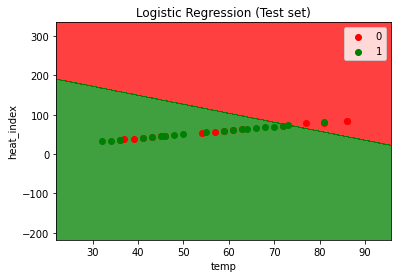

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


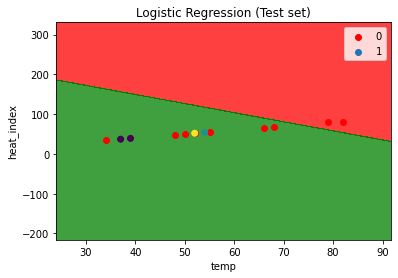

In [92]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 250, stop = X_set[:, 1].max() + 250, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('temp')
plt.ylabel('heat_index')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 250, stop = X_set[:, 1].max() + 250, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('temp')
plt.ylabel('heat_index')
plt.legend()
plt.show()